In [44]:
import numpy as np
import pandas as pd

In [46]:
boston = pd.read_csv("C:\\Users\\sdcbb\\Downloads\\HousingData (1).csv")

In [47]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [48]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [65]:
x = boston.iloc[:, boston.columns != 'MEDV']
y = boston['MEDV']  # Use Series, not DataFrame



In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(boston.isnull().sum()) 


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [67]:
boston = boston.dropna()
# Standardize features (important for DNN performance)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [68]:
model = Sequential()
model.add(Dense(128, input_shape=(x_train.shape[1],), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 15ms/step - loss: 553.0800 - mae: 21.7115 - val_loss: 477.9556 - val_mae: 20.4648
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 494.1386 - mae: 20.3177 - val_loss: 422.4125 - val_mae: 19.0943
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 430.7502 - mae: 18.7337 - val_loss: 354.8392 - val_mae: 17.3112
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 349.8852 - mae: 16.6761 - val_loss: 274.2120 - val_mae: 14.9151
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 260.4952 - mae: 14.0706 - val_loss: 187.1000 - val_mae: 11.7134
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 165.3914 - mae: 10.8775 - val_loss: 115.4309 - val_mae: 8.3347
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 94.1030 - mae: 7.9434 - val_loss: 78.1055 - val_mae: 6.4802
Epoch 8/100
9/9 [==============================] - 0s 5ms/s

In [54]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.4f}")


4/4 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Test MAE: nan


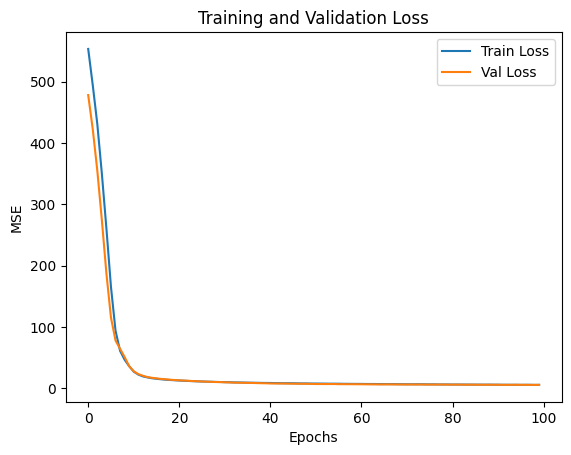

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training and Validation Loss")
plt.show()


3/3 [==============================] - 1s 2ms/step


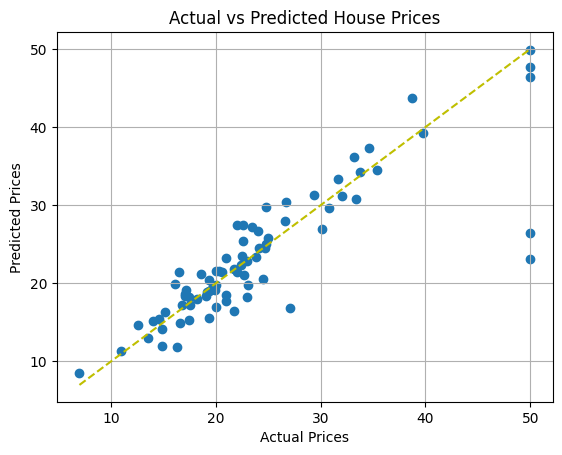

In [70]:
# Predict on test set
y_pred = model.predict(x_test)

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y--')  # perfect prediction line
plt.grid(True)
plt.show()
